In [6]:
#IMPORTS

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt



In [8]:
#DATA

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [9]:
# Normalisation des pixels
print(x_train.max(), x_train.min())

xmax = x_train.max()

x_train = x_train / xmax
x_test = x_test / xmax

print(x_train.max(), x_train.min())

255 0
1.0 0.0


In [74]:
# Création du modèle

hidden1 = 100
hidden2 = 100

model = keras.models.Sequential([
    keras.layers.Input((28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(hidden1, activation='relu'),
    keras.layers.Dense(hidden2, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [75]:
# Entrainer le modèle

batch_size = 700
epochs = 20

history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6511 - loss: 1.2125 - val_accuracy: 0.9222 - val_loss: 0.2647
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9303 - loss: 0.2442 - val_accuracy: 0.9443 - val_loss: 0.1904
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9483 - loss: 0.1815 - val_accuracy: 0.9556 - val_loss: 0.1535
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9567 - loss: 0.1449 - val_accuracy: 0.9641 - val_loss: 0.1262
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9665 - loss: 0.1150 - val_accuracy: 0.9662 - val_loss: 0.1165
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9715 - loss: 0.0991 - val_accuracy: 0.9655 - val_loss: 0.1132
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9744 - loss: 0.0867 - val_accuracy: 0.9713 - val_loss: 0.0960
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9789 - loss: 0.0726 - val_accuracy: 0.9714 - val_loss:

In [71]:
# Evaluer le modèle

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10058850795030594
Test accuracy: 0.9775999784469604


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Le Vrai chiffre est :  9
Le chiffre prédit est :  9


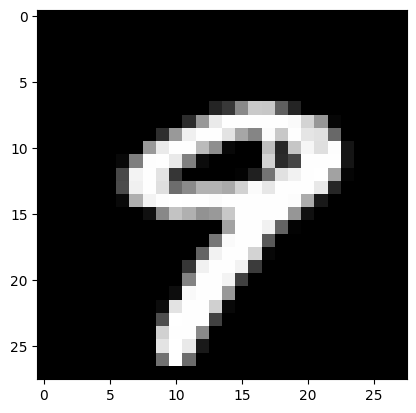

In [80]:
# Test d'un model de base sur MNIST

image = x_test[9]
prediction = model.predict(image.reshape(1, 28, 28))

print("Le Vrai chiffre est : ", y_test[9])
print("Le chiffre prédit est : ", np.argmax(prediction))

plt.imshow(image, cmap='gray')